In [59]:
include("ultrasoundgeneration.jl")

3

slice_multiprobe (generic function with 1 method)

In [2]:
using PyCall
pushfirst!(PyVector(pyimport("sys")."path"), "")
ultrasoundgeneration = pyimport("ultrasoundgeneration")

names = readdir(ultrasoundgeneration.test_volumes_path)


whoop


8-element Array{String,1}:
 "Pancreas_10.nrrd"
 "Pancreas_11.nrrd"
 "Pancreas_12.nrrd"
 "Pancreas_13.nrrd"
 "Pancreas_6.nrrd"
 "Pancreas_7.nrrd"
 "Pancreas_8.nrrd"
 "Pancreas_9.nrrd"

In [3]:
image, annotation = ultrasoundgeneration.load_image_annotation(
    names[1], ultrasoundgeneration.test_volumes_path)

iarray = np.array(image)
jimage = ItkImage(image)

ItkImage(CuTexture{Float32,3,CuTextureArray{Float32,3}}(CuTextureArray{Float32,3}(Ptr{Nothing} @0x0000000055bc7870, (223, 512, 512)), 0x0000000000000001), Float32[1.0 0.0 0.0; 0.0 -1.0 0.0; 0.0 0.0 -1.0], Float32[0.8203125, 0.8203125, 1.0])

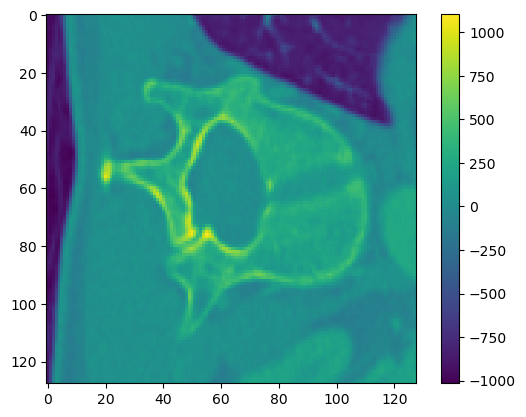

PyObject <matplotlib.colorbar.Colorbar object at 0x0000000064552BE0>

In [24]:
using PyPlot
t = generate_sample(jimage, annotation)
plt.imshow(t["data"][4])
colorbar()

In [40]:
network_parallel = pyimport("train_network_parallel2")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 4) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 1)  0           input_1[0

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood a

PyObject <module 'train_network_parallel2' from 'F:\\ct2-angledslice-align\\train_network_parallel2.py'>

In [48]:
function generate_data(jimages, annotations)
    res = []#::Array{Dict{String,Array{T,1} where T}, 1} = []
    for(jimage, annotation) = zip(jimages, annotations)
        for(i) = 1:128
            push!(res, generate_sample(jimage, annotation))
            #push!(res, ultrasoundgeneration.generate_sample(
            #        jimage, annotation))
        end
    end
    print("i")
    
    data = [] #::Array{Array{Float32, 3}, 1} = []
    classes = []
    for elem = res
        data_entry = cat(
            [reshape(x, Val(3)) for x in elem["data"]]...;
            dims=3
        ).* 1.0f0
        data_entry .+= 1000
        data_entry ./= 2000
        
        push!(data, np.array(data_entry))
        
        c = elem["classes"] 
        class_entry = vcat(c[1] ./ 4, 40 .* reshape(c[2], Val(1)))
        class_entry[[4, 8, 12]] .-= 40
        push!(classes, class_entry)
    end
    return data, classes
end
        
        

generate_data (generic function with 1 method)

In [34]:
function boop(data)
    data2 = zeros(Float32, (length(data), size(data[1])...))
    for i = 1:length(data)
        data2[i, :, :, :] = data[i]
    end
    return data2
end

    

boop (generic function with 1 method)

In [41]:
while true
    data, classes = generate_data([image for i = 1:60], [annotation for i = 1:60])
    network_parallel.model.fit(boop(data), boop(classes), batch_size=290,
        verbose=2)
end

i7680/7680 - 20s - loss: 3.9698
i

2020-06-11 10:49:45.155688: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX AVX2
2020-06-11 10:49:45.159346: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library nvcuda.dll
2020-06-11 10:49:45.250968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:01:00.0
2020-06-11 10:49:45.251464: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 1 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.7335
pciBusID: 0000:02:00.0
2020-06-11 10:49:45.251476: I tensorflow/stream_executor/platform/default/dlopen_checker_stub.cc:25] GPU libraries are statically linked, skip dlopen check.
2020-06-11 10:49:45.253296: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1763] Adding visible gpu devices: 0, 1

7680/7680 - 14s - loss: 3.5633
i7680/7680 - 14s - loss: 3.3723
i7680/7680 - 14s - loss: 3.2125
i7680/7680 - 14s - loss: 3.0389
i7680/7680 - 14s - loss: 2.8961
i7680/7680 - 14s - loss: 2.7986
i7680/7680 - 14s - loss: 2.6954
i7680/7680 - 14s - loss: 2.5515
i7680/7680 - 14s - loss: 2.5584
i7680/7680 - 14s - loss: 2.4188
i7680/7680 - 14s - loss: 2.4081
i7680/7680 - 14s - loss: 2.3372
i7680/7680 - 14s - loss: 2.2890
i7680/7680 - 14s - loss: 2.2896
i7680/7680 - 14s - loss: 2.2268
i7680/7680 - 14s - loss: 2.1543
i7680/7680 - 14s - loss: 2.1279
i7680/7680 - 14s - loss: 2.0799
i7680/7680 - 14s - loss: 2.0433
i7680/7680 - 14s - loss: 2.0108
i7680/7680 - 14s - loss: 1.9936
i7680/7680 - 14s - loss: 1.9480
i7680/7680 - 14s - loss: 1.9596
i7680/7680 - 14s - loss: 1.9430
i7680/7680 - 14s - loss: 1.9592
i7680/7680 - 14s - loss: 1.8536
i7680/7680 - 14s - loss: 1.8229
i7680/7680 - 14s - loss: 1.8335
i7680/7680 - 14s - loss: 1.8136
i7680/7680 - 14s - loss: 1.7922
i7680/7680 - 14s - loss: 1.7442
i7680/768

InterruptException: InterruptException:

In [66]:
using BenchmarkTools

In [73]:
@time [generate_sample(jimage, annotation) for _ = 1:7000]
0

 39.180512 seconds (5.93 M allocations: 2.142 GiB, 0.54% gc time)


0

In [60]:
@time data, classes = generate_data([jimage for i = 1:60], [annotation for i = 1:60])

i 39.553094 seconds (8.95 M allocations: 8.088 GiB, 11.74% gc time)


(Any[Float32[0.028015625 0.030582031 … 0.5203125 0.531293; 0.030230468 0.035628907 … 0.5365723 0.5416953; … ; -0.0031835937 0.03592578 … 0.4670332 0.48790625; -0.00071484374 0.035208985 … 0.48455665 0.49600196]

Float32[0.45280468 0.4665801 … 0.53944725 0.5473027; 0.45801562 0.46156445 … 0.5332637 0.5359863; … ; 0.029845703 0.025947265 … 0.6024297 0.58986914; 0.033439454 0.027710937 … 0.6033086 0.5963555]

Float32[0.48307618 0.48723632 … 0.5157344 0.528873; 0.4752539 0.48297265 … 0.5132871 0.5274336; … ; 0.44540235 0.46636525 … 0.5632246 0.5517207; 0.45093164 0.47066602 … 0.5648008 0.5523965]

Float32[0.5372227 0.5298008 … 0.58438087 0.58343166; 0.5363555 0.5391875 … 0.56893164 0.5704785; … ; 0.43149024 0.545416 … 0.5422227 0.54127735; 0.4218086 0.54643553 … 0.54475194 0.54689646], Float32[0.52867776 0.5243945 … 0.5437539 0.53933007; 0.53461134 0.53175193 … 0.55022854 0.5372559; … ; 0.025798827 0.027636718 … 0.55950195 0.5557246; 0.02697461 0.025394531 … 0.55597854 0.5588613]

Float32[

In [ ]:
network_parallel.model.fit(boop(data), boop(classes))

In [61]:
predictions = network_parallel.model.predict(boop(data))

7680×12 Array{Float32,2}:
  2.52913    -0.764432  -5.43097    …  -0.212801   -0.108699   -0.0591231
  0.766476    1.44241   -2.01208       -3.14383     0.329647   -0.106191
  0.978603    1.57784   -1.37891       -0.812711    0.358065   -0.0602536
 -0.161399    3.17269   -0.49468        1.40438    -0.119512   -0.0777724
 -0.123299   -1.10281   -0.510429      -1.10934    -0.108767   -0.068844
 -2.62552    -1.09032    2.61146    …   1.97087     0.81801    -0.0856493
 -0.0708457   2.44745   -0.270213      -0.67609     0.556693   -0.06445
 -0.79272     1.10694   -0.395453      -0.825988    0.158458   -0.087961
 -1.30542    -2.90321    2.95225        3.17488    -0.282979   -0.134352
  0.223075   -1.68226    0.0829421      0.0132688   0.101894   -0.0729592
  2.07438     1.13465   -0.678393   …  -1.15374    -0.473867   -0.0836564
  0.955711   -3.73289   -1.82024       -0.728857    0.0121814  -0.0677419
  2.90675    -1.62822    2.8929        -0.0216066   0.256201   -0.0697445
  ⋮               

In [62]:
gtruth = boop(classes)

7680×12 Array{Float32,2}:
  2.38165    -0.29684   -5.83047   -0.307141   …  -0.455574  -0.0172479
  2.19323     3.95481   -2.4532    -0.209825       1.19961   -0.0990468
  1.14094     3.13384   -1.24823   -0.0899851      1.59979   -0.0348039
 -0.130671    4.41805    0.471059  -0.136896      -2.18326   -0.0891098
 -0.269469   -1.97331   -0.229291  -0.165223      -0.539468  -0.026219
 -2.89128    -1.07747    2.64499   -0.171259   …   2.07665   -0.124728
 -0.332944    2.7537     0.511072  -0.221778      -1.04217   -0.121241
 -0.973581   -0.047066  -0.118874  -0.0924924      1.43311   -0.0535527
 -1.24787    -2.84099    3.72088   -0.290244       1.39956   -0.153293
 -0.159302   -1.60626   -0.039434  -0.150604       0.417236  -0.0602684
  2.22509     2.95867   -0.906288  -0.233924   …   1.13619   -0.0167364
  0.918268   -3.39437   -1.14014   -0.147549       1.33315   -0.0222224
  2.93061    -0.485529   2.14838   -0.0903151      0.341314  -0.0449521
  ⋮                                       

In [18]:
pp = boop(data)

7680×128×128×4 Array{Float32,4}:
[:, :, 1, 1] =
 0.0302305  0.0331016  0.0324355  0.0330859  …   0.0263281    0.0289805
 0.0283184  0.0300176  0.0270234  0.0268691      0.0299258    0.0278906
 0.0304141  0.0203262  0.0141035  0.0160254      0.0600078    0.0618242
 0.485873   0.480633   0.481084   0.491443       0.0143555    0.00499414
 0.529268   0.524156   0.525322   0.53282        0.53607      0.535408
 0.519486   0.519635   0.526844   0.533971   …  -0.00179297  -0.0024375
 0.505543   0.510426   0.5051     0.495541       0.0388887    0.0410938
 0.525746   0.530197   0.537396   0.541025       0.436662     0.446055
 0.0263691  0.0309277  0.0279336  0.0260313      0.514621     0.464613
 0.646811   0.563029   0.512262   0.507564       0.463939     0.455676
 0.45817    0.465129   0.46651    0.472859   …   0.458299     0.45733
 0.0462969  0.038668   0.0345176  0.0283789      0.0369336    0.0337891
 0.0677285  0.0795762  0.0761543  0.0638828      0.45877      0.458818
 ⋮                    

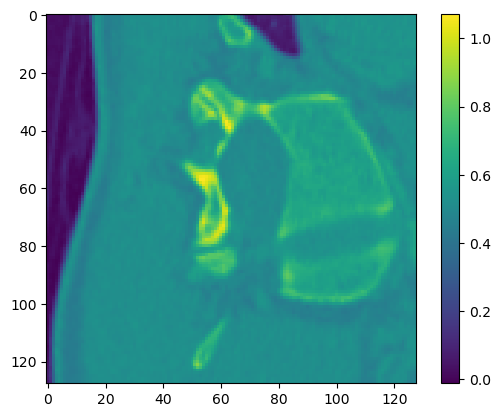

PyObject <matplotlib.colorbar.Colorbar object at 0x00000000B21B79E8>

In [26]:
imshow(pp[530, :, :, 4] )
colorbar()

In [53]:
predictions

7680×12 Array{Float32,2}:
 0.165403  -0.126695  -40.0051  39.7584  …  0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584  …  0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584  …  0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 0.165403  -0.126695  -40.0051  39.7584     0.00604694  -39.9236  39.8763
 ⋮          

In [64]:
1f0

1.0f0

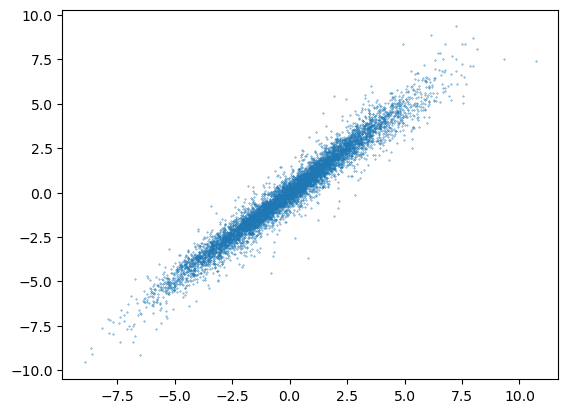

PyObject <matplotlib.collections.PathCollection object at 0x0000001CA988EF28>

In [63]:
scatter(predictions[:, 1], gtruth[:, 1], s=.1)

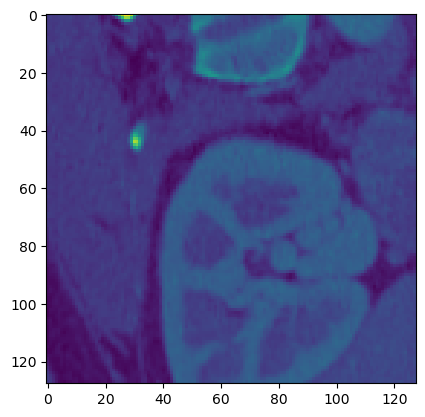

PyObject <matplotlib.image.AxesImage object at 0x0000001CA7EE6780>

In [56]:
imshow(data[1][:, :, 1])

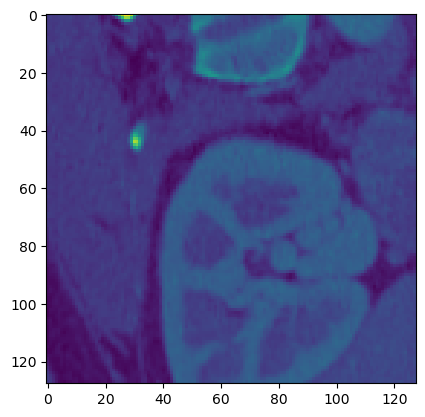

PyObject <matplotlib.image.AxesImage object at 0x0000001CA9F1F2E8>

In [57]:
imshow(data[1][:, :, 3])

In [74]:
@btime generate_sample(jimage, annotation)

  2.833 ms (821 allocations: 319.30 KiB)


Dict{String,Array{T,1} where T} with 2 entries:
  "classes" => Array{Float64,N} where N[[15.6977, 18.5604, -12.931], [0.995609 …
  "data"    => Array{Float32,2}[[-965.027 -917.938 … -65.8906 -33.3945; -958.46…